In [3]:
from ROOT import *

gROOT.ProcessLine(".x setTDRStyle.C")
gStyle.SetOptStat(0);
gStyle.SetOptFit(0);

In [2]:
# Directory of ROOT file containing histograms
f1 = TFile("rootfiles/variableSpec_mumu_pt30.root");
f1.cd()

hdata = f1.Get("Higgs2mumu_Run2012_diMuonMass")
hmc = f1.Get("DYJets_diMuonMass")

print("nevents = (Higgs2mumu): ", hdata.Integral(), ";; (DY2mumu): ", hmc.Integral())

nevents = (Higgs2mumu):  48059.0 ;; (DY2mumu):  17652.0


In [10]:
modes = [
    "cktpt",
    "eta",
    "trackerLayers",
    "pixelHits",
    "RelIso",
    "dxyVTX",
    "dzVTX",
    "muonHits",
    "nMatches",
    "cktptReso",
]

gObjects = []

In [80]:
def DrawHist(h1, h2, suffix):
    cW, cH = 1000, 1000
    
    h1.SetLineColor(kBlue)
    h2.SetLineColor(kRed)
    h1.SetLineWidth(2)
    h2.SetLineWidth(2)
    
    h1.Sumw2()
    h2.Sumw2()
    
    h2.Scale(h1.Integral()/h2.Integral())
    
    c = TCanvas("c"+suffix, "c"+suffix, cW, cH)
    c.cd()
    #c.SetLogy()
    p1 = TPad("pad1_"+suffix, "pad1_"+suffix, 0.01,0.05,0.99,0.99)
    p1.Draw()
    p1.cd()
    p1.SetTopMargin(0.08);
    p1.SetBottomMargin(0.3);
    p1.SetRightMargin(0.1);
    p1.SetLeftMargin(0.2);
    p1.SetFillStyle(0);
    
    h1.SetTitle("CMS Preliminary at #sqrt{s} = 8 TeV, " + suffix)
    if suffix.endswith("cktpt"):
        h2.Draw("hist")
        h2.SetLabelSize(0.0)
        h2.GetYaxis().SetTitleOffset(1.5)
        h2.GetYaxis().SetTitle("Events")
    else:
        h1.Draw("hist");
        h1.SetLabelSize(0.0);
        h1.GetYaxis().SetTitleOffset(1.5);
        h1.GetYaxis().SetTitle("Events");
    h2.Draw("histsame");
    h1.Draw("histsame");

    legend = TLegend(0.80, 0.80, 0.90, 0.90);
    legend.AddEntry(h1, "Higgs", "l");
    legend.AddEntry(h2, "DY", "l");
    legend.SetFillColor(0);
    legend.Draw("0");

    p2 = TPad("pad2_"+suffix,"pad2"+suffix,0.01,0.05,0.99,0.32);
    p2.Draw();
    p2.cd();
    p2.SetTopMargin(0.11);
    p2.SetBottomMargin(0.30);
    p2.SetRightMargin(0.091);
    p1.SetLeftMargin(0.137);
    p2.SetFillStyle(0);
    p2.SetGrid();
    
    hratio = h1.Clone();
    hratio.Reset()
    hratio.Divide(h1, h2);
    hratio.GetXaxis().SetTitle(suffix);
    hratio.SetTitle("");
    hratio.GetXaxis().SetMoreLogLabels();
    hratio.GetXaxis().SetNoExponent();
    hratio.GetYaxis().SetTitle("Higgs/DY");
    hratio.GetXaxis().SetTitleSize(0.13);
    hratio.GetYaxis().SetTitleSize(0.12);
    hratio.GetYaxis().SetTitleOffset(0.4);
    hratio.GetXaxis().SetLabelSize(0.11);
    hratio.GetYaxis().SetLabelSize(0.12);
    hratio.GetYaxis().SetNdivisions(505)

    hratio.SetMaximum(2.0);
    hratio.SetMinimum(0.0);
    hratio.SetMarkerSize(0.5);
    hratio.Draw("e1p");
    hratio.Fit("pol0");
    
    p1.Modified()
    p2.Modified()
    c.Modified()
    c.Draw()
    c.SaveAs("plots/Histogram_"+ suffix + ".png");
    #c1.Clear();
    
    return [c, p1, p2, hratio]


****************************************
Minimizer is Linear / Migrad
Chi2                      =      3552.35
NDf                       =           97
p0                        =    0.0226269   +/-   0.000792701 


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cdiMuonMass
Info in <TCanvas::Print>: png file plots/Histogram_diMuonMass.png has been created


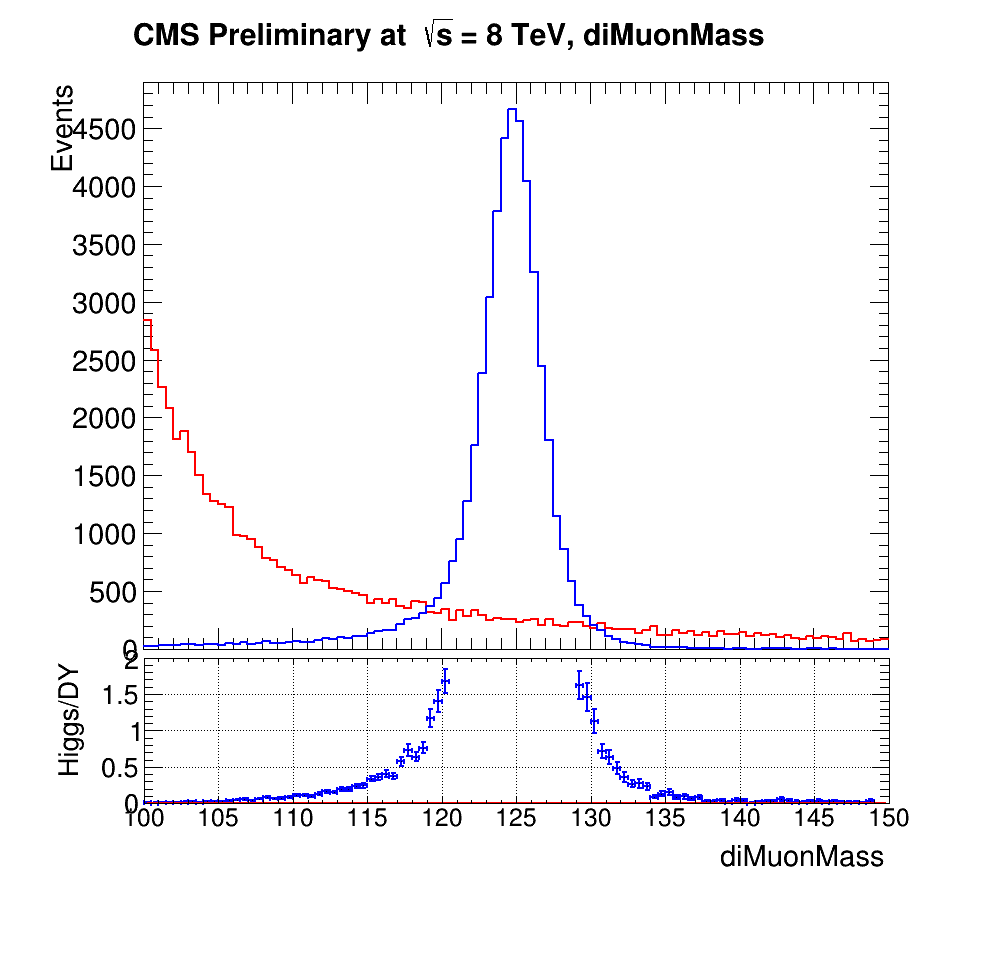

In [81]:
#HiggsDimuonMass = "Higgs2mumu_Run2012_diMuonMass";
#DYDimuonMass = "DYJets_diMuonMass";
#dimuonCharge = " ";
#dimuonMode = "diMuonMass";

#DrawHist(hdata, hmc, HiggsDimuonMass, DYDimuonMass, dimuonCharge, dimuonMode);

#DrawHist(hdata, hmc, "Higgs2mumu_Run2012_diMuonMass", "DYJets_diMuonMass", " ", "diMuonMass")
objs = DrawHist(hdata, hmc, "diMuonMass")
gObjects.extend(objs)

nevents = (data):  34427.0 ;; (DY MC):  34463.0
nevents = (data):  34463.0 ;; (DY MC):  34426.99999999999
nevents = (data):  49070.0 ;; (DY MC):  49069.999999999985
nevents = (data):  49070.0 ;; (DY MC):  49070.00000000001
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC):  49069.99999999999
nevents = (data):  49070.0 ;; (DY MC):  49070.00000000001
nevents = (data):  49070.0 ;; (DY MC):  49070.0
nevents = (data):  49070.0 ;; (DY MC)

Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ccktpt
Info in <TCanvas::Print>: png file plots/Histogram_cktpt.png has been created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ccktpt
Info in <TCanvas::Print>: png file plots/Histogram_cktpt.png has been created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: ceta
Info in <TCanvas::Print>: png file plots/Histogram_eta.png has been created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Wa

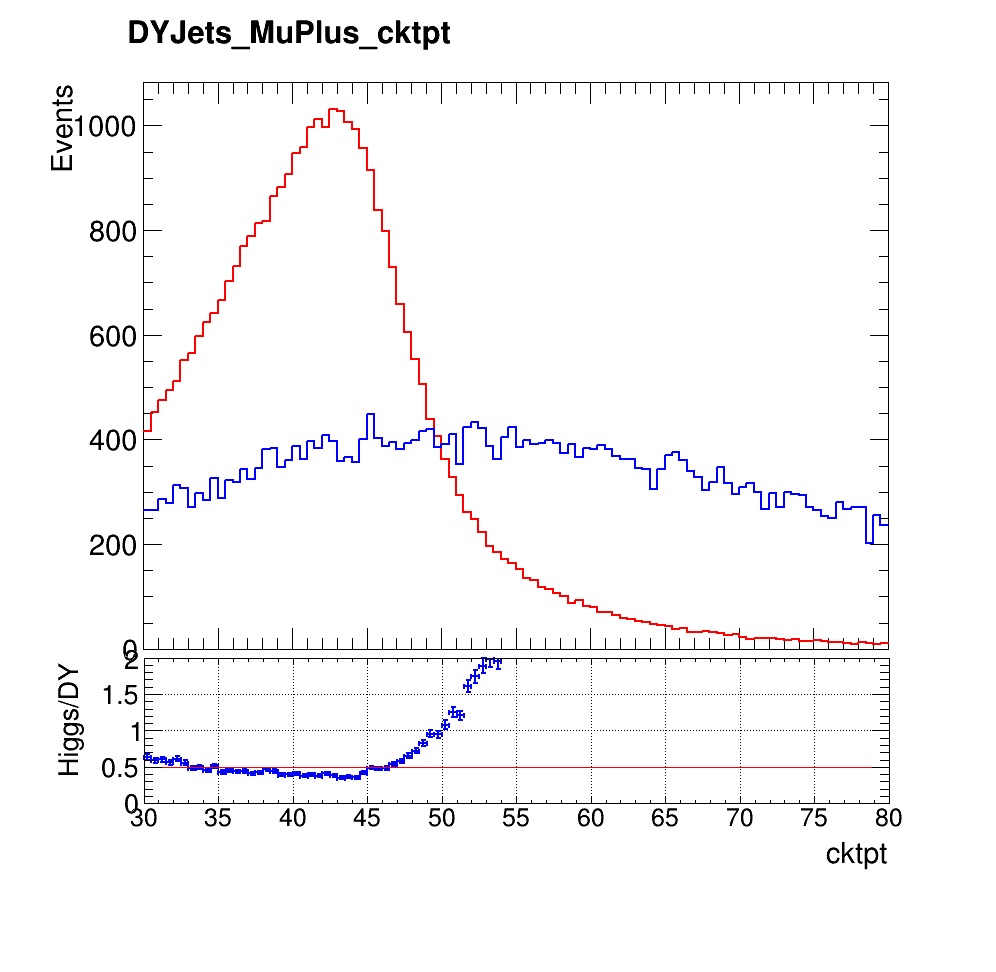

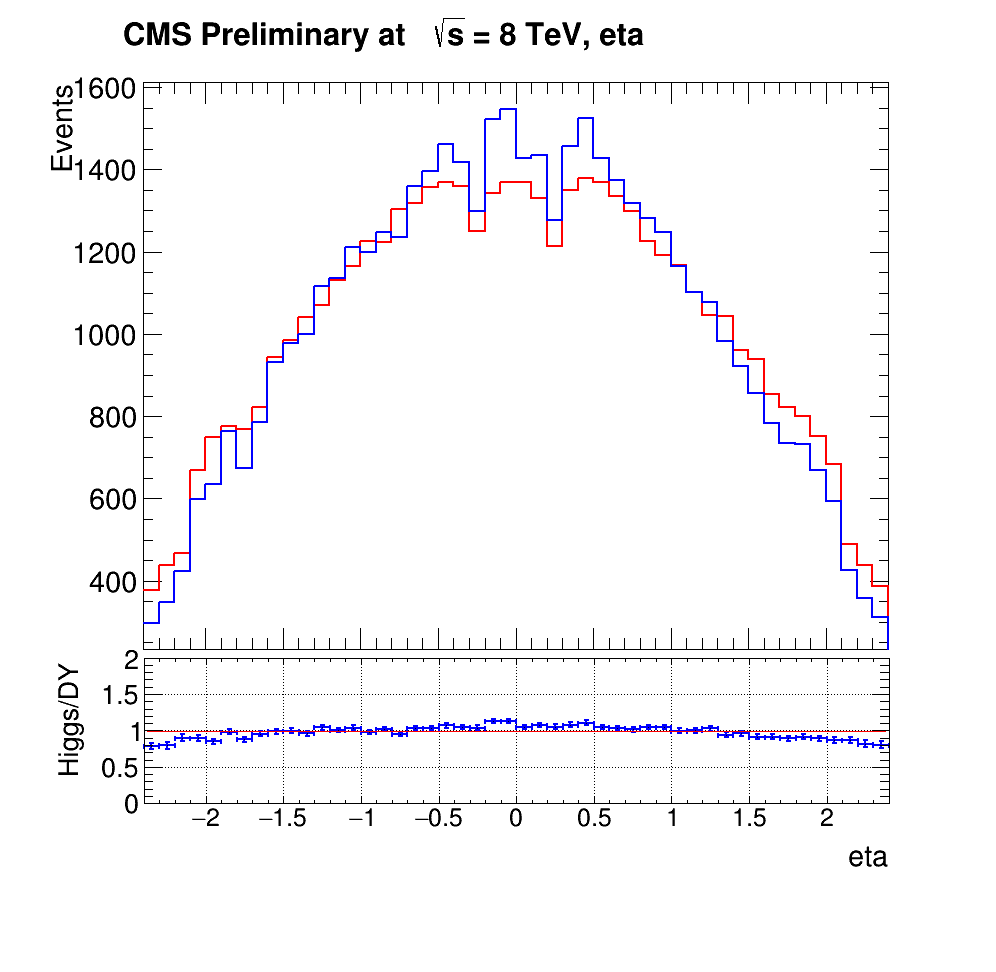

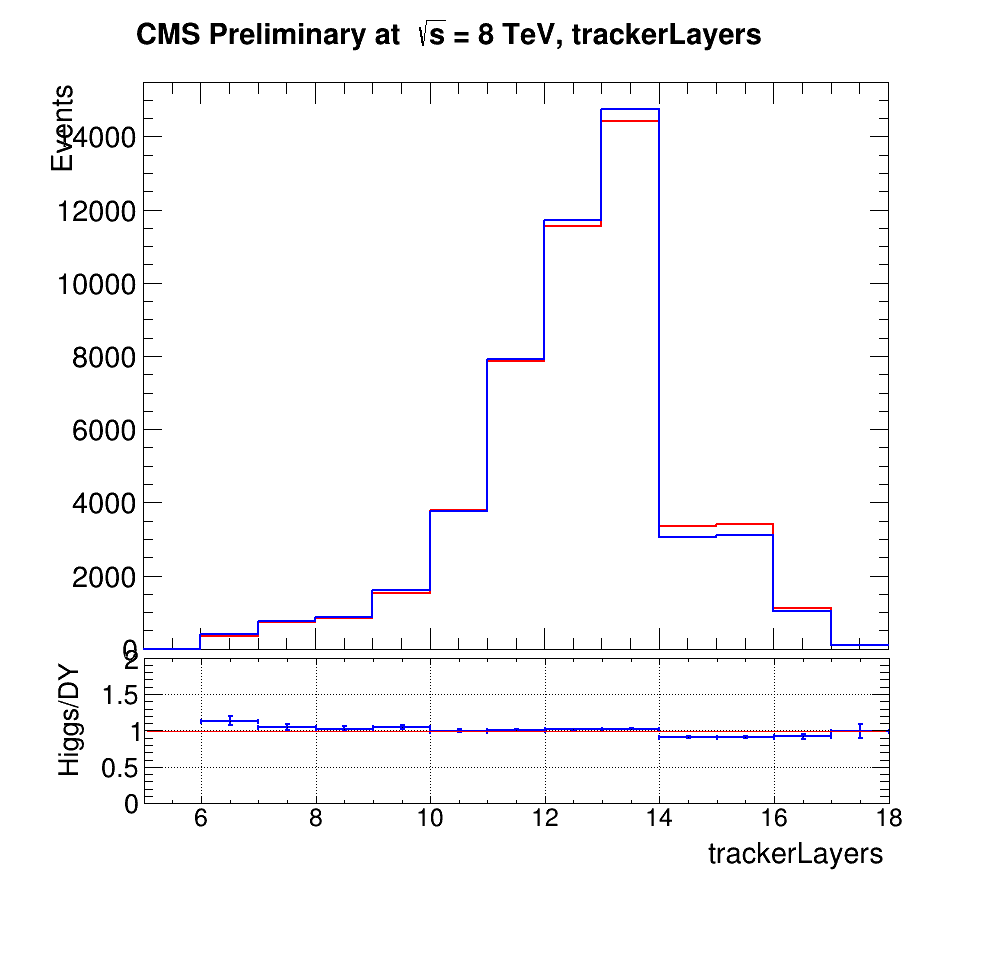

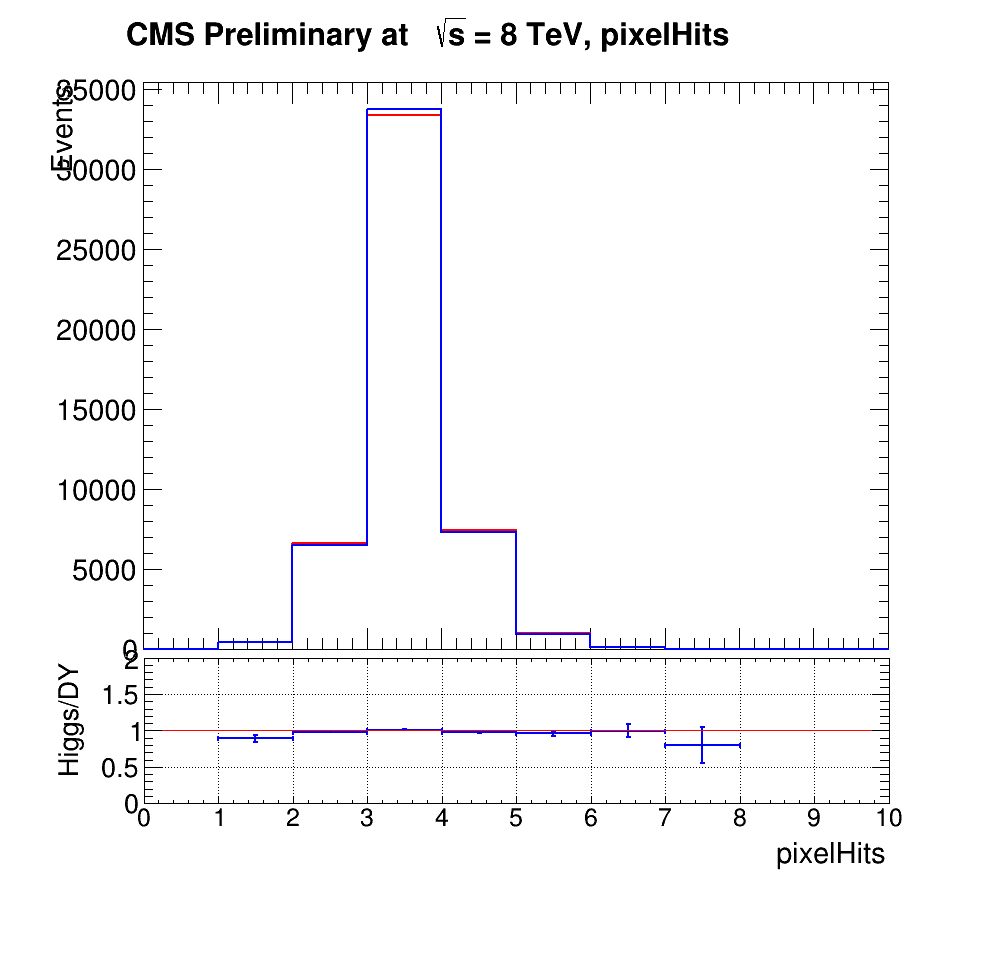

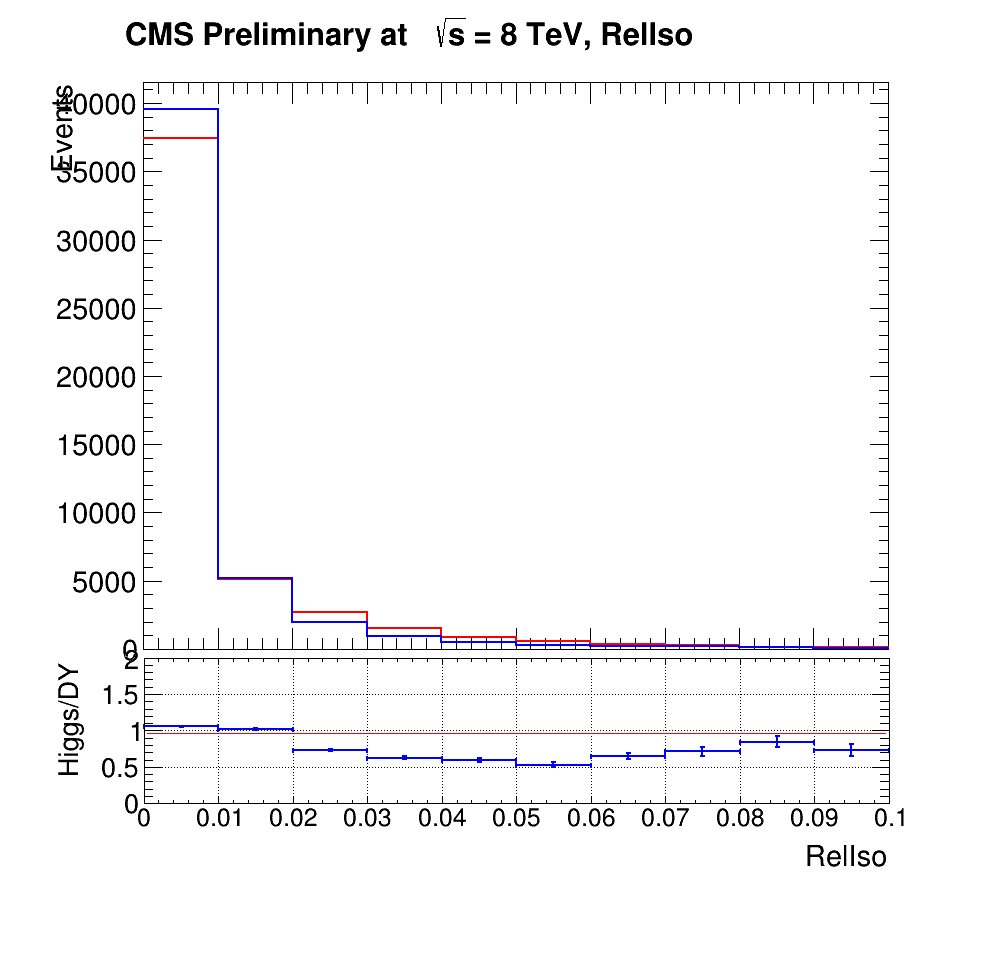

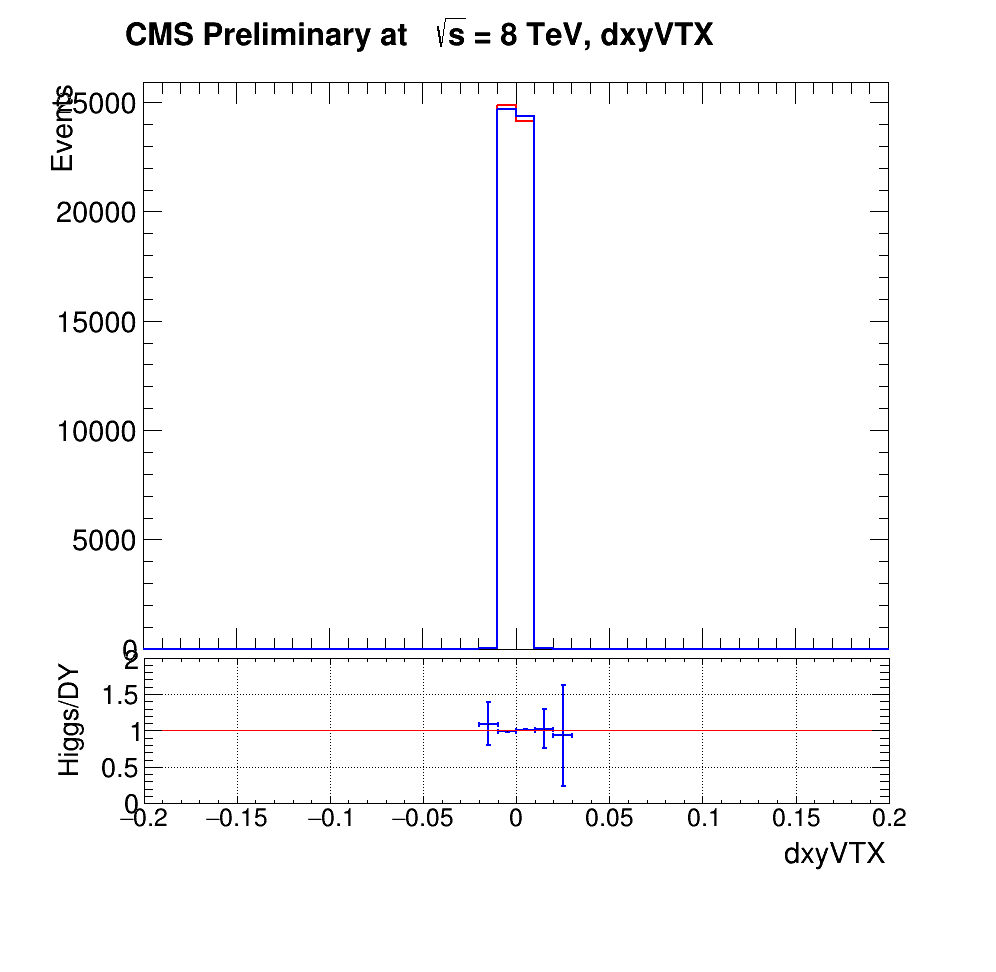

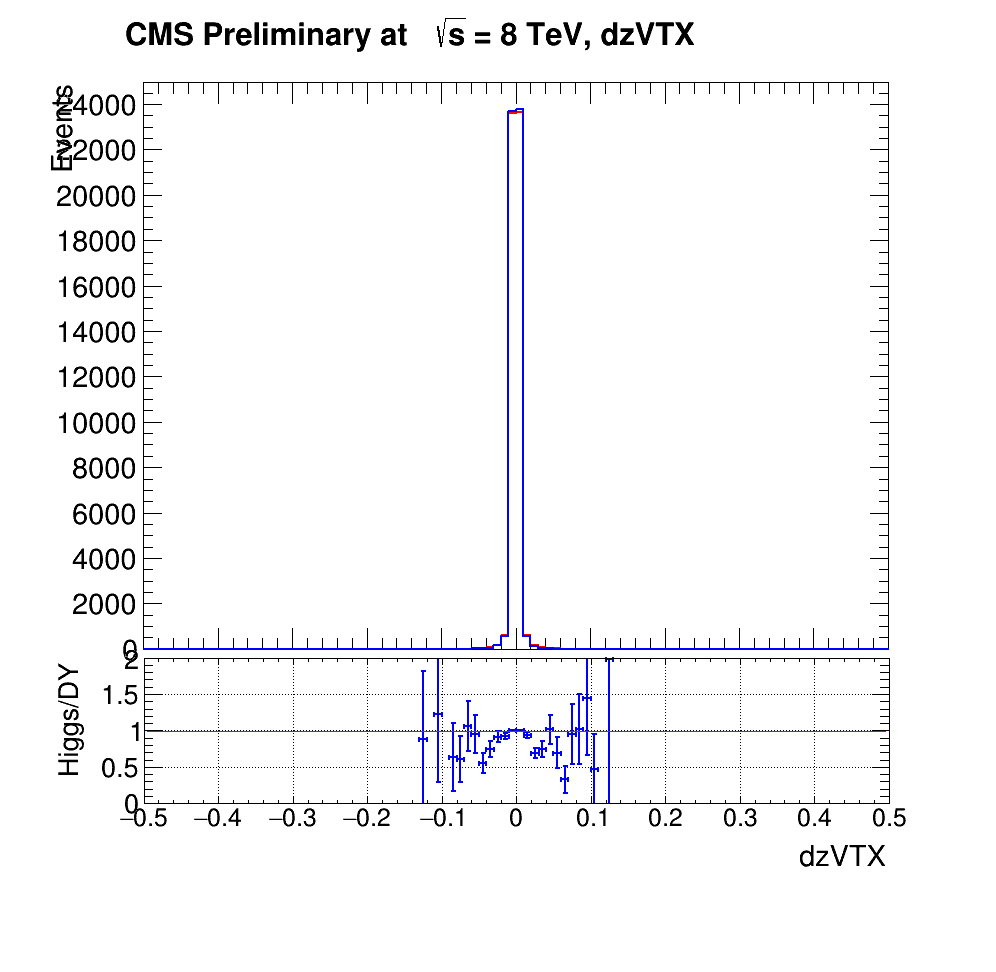

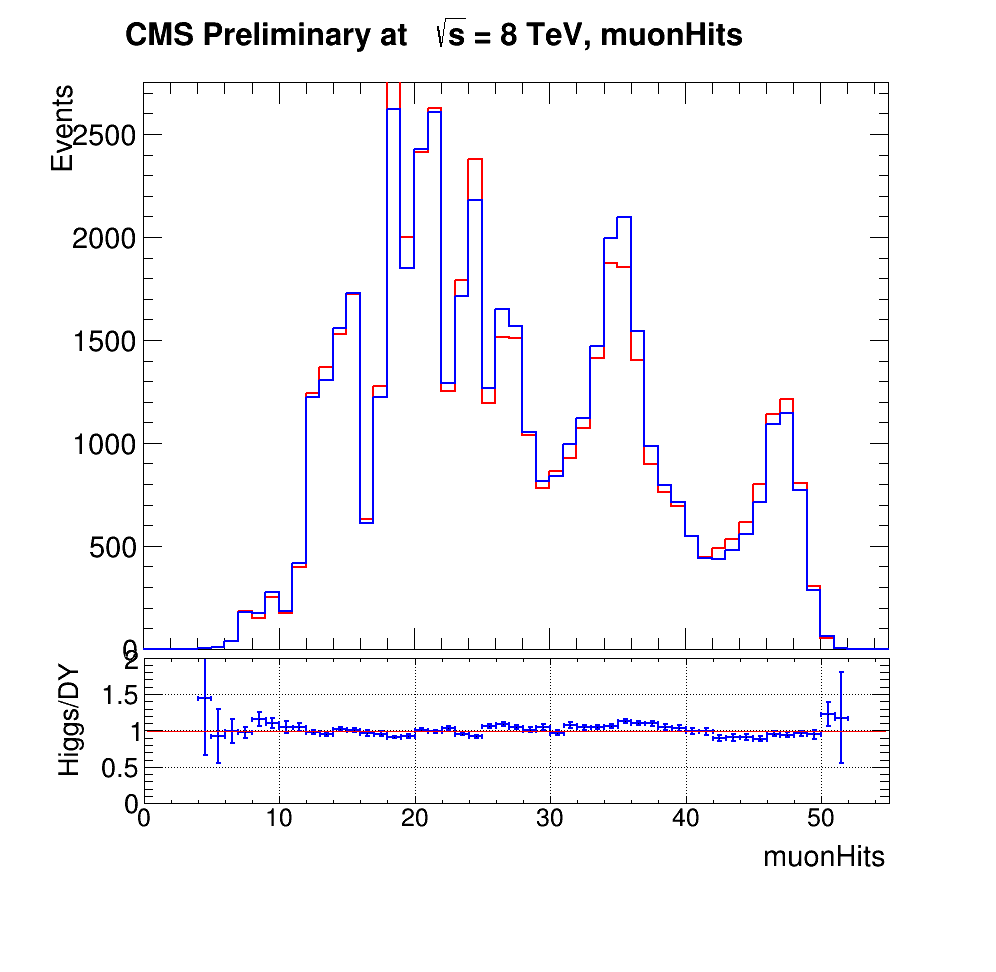

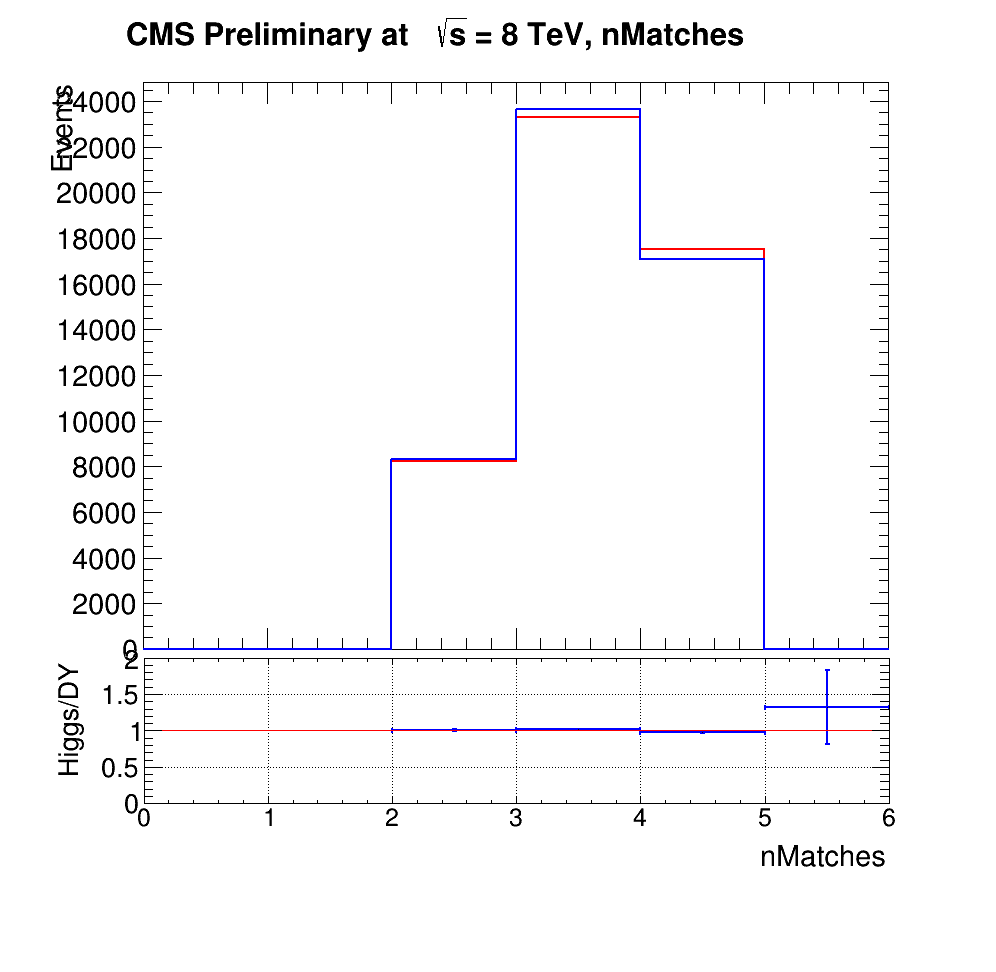

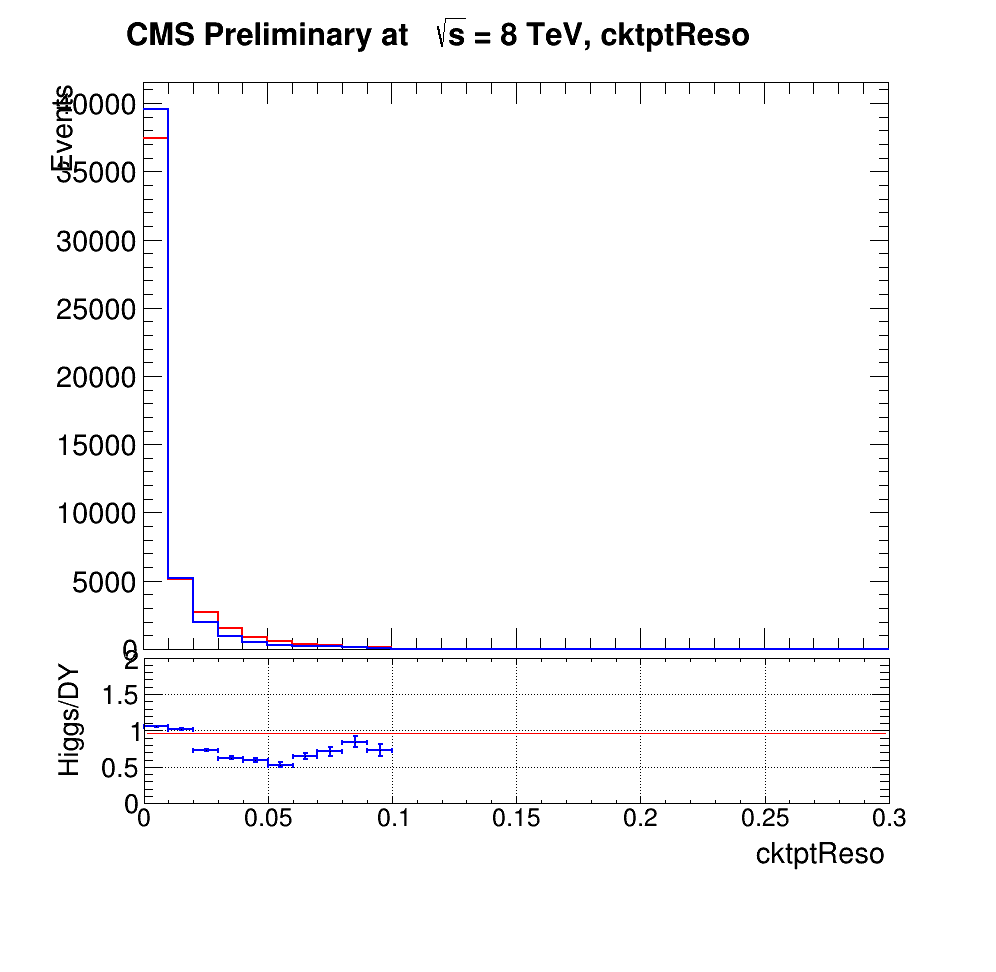

In [82]:
higgs = "Higgs2mumu_Run2012_";
dy = "DYJets_";

for mode in modes:

    higgsHistNamePlus = higgs + "MuPlus_" + mode;
    higgsHistNameMinus = higgs + "MuMinus_" + mode;

    dyHistNamePlus = dy + "MuPlus_" + mode;
    dyHistNameMinus = dy + "MuPlus_" + mode;

    h1plus = f1.Get(higgsHistNamePlus);
    h2plus = f1.Get(dyHistNamePlus);
    print("nevents = (data): ", h1plus.Integral(), ";; (DY MC): ", h2plus.Integral())
    objs = DrawHist(h1plus, h2plus, mode);
    gObjects.extend(objs)

    h1minus = f1.Get(higgsHistNameMinus);
    h2minus = f1.Get(dyHistNameMinus);
    print("nevents = (data): ", h1minus.Integral(), ";; (DY MC): ", h2minus.Integral())
    objs = DrawHist(h1minus, h2minus, mode);
    gObjects.extend(objs)